In [28]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import csv
import matplotlib.pyplot as plt 

%matplotlib inline
import matplotlib.pyplot as plt

train_set = pd.read_csv('/Users/kimginam/Pandas/movies_train.csv')
test_set = pd.read_csv('/Users/kimginam/Pandas/movies_test.csv')

In [3]:
!cat movies_train.csv | wc -l

cat: movies_train.csv: No such file or directory
       0


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [156]:
train_set['dir_prev_bfnum'].fillna(0, inplace=True)

In [135]:
train_set.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [66]:
train_set['genre'].value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53076 missing from c

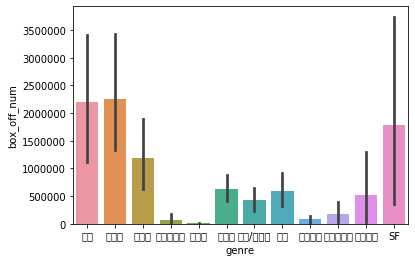

In [54]:
sns.barplot(data=train_set, x="genre", y="box_off_num")
plt.show()

In [38]:
all_genres = sum(genre,[])
len(set(all_genres))

0

In [145]:
features = ['title', 'genre', 'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor']

In [157]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  600 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [158]:
X = train_set[features]

In [159]:
y = train_set.box_off_num

In [123]:
corr_matrix = train_set.corr()
corr_matrix["box_off_num"].sort_values(ascending=False)

box_off_num       1.000000
num_staff         0.544265
time              0.441452
dir_prev_bfnum    0.283184
dir_prev_num      0.259674
num_actor         0.111179
Name: box_off_num, dtype: float64

In [160]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories='auto')
X_cat = encoder.fit_transform(X[['title','genre', 'screening_rat', 'director']]).toarray()

In [161]:
X_num = X.drop(['title','genre', 'screening_rat', 'director'], axis=1)

In [162]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [163]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attribs = ["dir_prev_bfnum", "dir_prev_num", "num_staff", "num_actor"]
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler()),
    ])

cat_attribs = ["title", "genre", "screening_rat", "director"]
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [164]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [168]:
boxoffice_prepared = full_pipeline.fit_transform(X)
boxoffice_prepared

array([[-0.36128522, -0.74141595, -0.36321641, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.52653038,  0.95002728,  1.4251242 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.19254616,  2.64147051,  1.15928978, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.36128522, -0.74141595, -0.16988229, ...,  0.        ,
         0.        ,  0.        ],
       [-0.36128522, -0.74141595,  1.69095861, ...,  0.        ,
         0.        ,  0.        ],
       [-0.36128522, -0.74141595,  1.28012361, ...,  0.        ,
         0.        ,  0.        ]])

## Model

In [166]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(boxoffice_prepared, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=42, solver='cholesky', tol=0.001)

In [170]:
some_data = X.iloc[:5]
some_labels = y.iloc[:5]
some_prepared = full_pipeline.transform(some_data)

print(list(some_labels))
ridge_reg.predict(some_prepared)

[23398, 7072501, 6959083, 217866, 483387]


array([ 182485.43961161, 5005241.43053127, 5366328.36450896,
        193256.55281271,  783264.32422753])

## RMSE

In [174]:
from sklearn.metrics import mean_squared_error
from math import sqrt

housing_predictions = ridge_reg.predict(boxoffice_prepared)
lin_mse = mean_squared_error(y, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

507438.90218236437